In [2]:
import sqlite3
import pandas as pd

con = sqlite3.connect('imdb_2022-02-13.db')  # подключение
cur = con.cursor()  # курсор

In [218]:
query = '''
SELECT name, MAX(premiered) AS max_premiered, 
	MIN(premiered) AS min_premiered,
	born, GROUP_CONCAT(film_type) as film_type, GROUP_CONCAT(genre_name) as genre,  AVG(votes) as avg_votes, 
	AVG(rating) AS avg_rating,
	died
FROM people 
	JOIN crew ON crew.title_id = people.person_id
	JOIN titles ON crew.title_id = titles.title_id
	JOIN rating ON rating.title_id = crew.title_id
	JOIN film_genres ON film_genres.title_id = titles.title_id
	JOIN genre_types ON genre_types.id = film_genres.genre_id
	JOIN film_types ON film_types.id = titles.type
	JOIN role_categories ON crew.category = role_categories.id
WHERE role_type IN ("actor", "actress") AND died != "None"
GROUP BY name
ORDER BY born
'''

df = pd.read_sql_query(query, con=con)
df_or = df
df_or

,name,max_premiered,min_premiered,born,film_type,genre,avg_votes,avg_rating,died
0,Aaron Braunstein,1994.0,1994.0,NaN,"tvSeries,tvSeries,tvSeries,tvSeries,tvSeries,t...","Crime,Drama,Crime,Drama,Crime,Drama,Crime,Dram...",90.0,7.3,2014
1,Aaron Butler,1992.0,1992.0,NaN,"tvEpisode,tvEpisode,tvEpisode,tvEpisode","Crime,Crime,Crime,Crime",7.0,5.4,2013
2,Abdolali Homayoon,1993.0,1993.0,NaN,"video,video,video,video,video,video,video,vide...","Adult,Adult,Adult,Adult,Adult,Adult,Adult,Adul...",99.0,7.0,2006
3,Abraham Shakespeare,2015.0,2015.0,NaN,"short,short","Animation,Short",37.0,9.5,2009
4,Achille Piazzi,2003.0,2003.0,NaN,"tvEpisode,tvEpisode,tvEpisode,tvEpisode,tvEpis...","Drama,Romance,Drama,Romance,Drama,Romance,Dram...",191.0,7.8,1975
...,...,...,...,...,...,...,...,...,...
54171,Smash4$,2011.0,2011.0,2003.0,"tvEpisode,tvEpisode,tvEpisode,tvEpisode,tvEpis...","Comedy,Drama,Comedy,Drama,Comedy,Drama,Comedy,...",98.0,6.6,2009
54172,Nikita Waligwa,2018.0,2018.0,2004.0,"tvEpisode,tvEpisode,tvEpisode,tvEpisode,tvEpis...","Animation,Animation,Animation,Animation,Animat...",5.0,6.8,2020
54173,Koko,2014.0,2014.0,2005.0,"tvEpisode,tvEpisode,tvEpisode,tvEpisode","Drama,Drama,Drama,Drama",48.0,9.5,2012
54174,Brody Stephens,2015.0,2015.0,2008.0,"tvEpisode,tvEpisode,tvEpisode,tvEpisode,tvEpis...","Crime,Drama,Romance,Crime,Drama,Romance,Crime,...",10.0,6.5,2017


In [219]:
import numpy as np

def popular(st):
    l = st.split(',')
    l = sorted(l, key = lambda x: l.count(x), reverse=True)
    return l[0]

df['film_type'] = df['film_type'].apply(popular)
df['genre'] = df['genre'].apply(popular)
df

,name,max_premiered,min_premiered,born,film_type,genre,avg_votes,avg_rating,died
0,Aaron Braunstein,1994.0,1994.0,NaN,tvSeries,Crime,90.0,7.3,2014
1,Aaron Butler,1992.0,1992.0,NaN,tvEpisode,Crime,7.0,5.4,2013
2,Abdolali Homayoon,1993.0,1993.0,NaN,video,Adult,99.0,7.0,2006
3,Abraham Shakespeare,2015.0,2015.0,NaN,short,Animation,37.0,9.5,2009
4,Achille Piazzi,2003.0,2003.0,NaN,tvEpisode,Drama,191.0,7.8,1975
...,...,...,...,...,...,...,...,...,...
54171,Smash4$,2011.0,2011.0,2003.0,tvEpisode,Comedy,98.0,6.6,2009
54172,Nikita Waligwa,2018.0,2018.0,2004.0,tvEpisode,Animation,5.0,6.8,2020
54173,Koko,2014.0,2014.0,2005.0,tvEpisode,Drama,48.0,9.5,2012
54174,Brody Stephens,2015.0,2015.0,2008.0,tvEpisode,Crime,10.0,6.5,2017


In [228]:
df1 = df
df1.dropna(subset = df1.columns[:-1], inplace=True)
df.dropna(inplace=True)
df1

,name,max_premiered,min_premiered,born,film_type,genre,avg_votes,avg_rating,died
2186,Flavius Josephus,1998.0,1998.0,37.0,short,Drama,9.0,6.8,95
2187,Shikibu Murasaki,1964.0,1964.0,973.0,tvEpisode,Comedy,38.0,7.5,1031
2188,Saxo Grammaticus,1982.0,1982.0,1150.0,movie,Family,6.0,6.8,1220
2189,Jalaluddin Muhammad Rumi,1995.0,1995.0,1207.0,tvEpisode,Action,7.0,4.8,1273
2190,Arcipreste de Hita,2000.0,2000.0,1283.0,movie,Adventure,141.0,4.4,1350
...,...,...,...,...,...,...,...,...,...
54171,Smash4$,2011.0,2011.0,2003.0,tvEpisode,Comedy,98.0,6.6,2009
54172,Nikita Waligwa,2018.0,2018.0,2004.0,tvEpisode,Animation,5.0,6.8,2020
54173,Koko,2014.0,2014.0,2005.0,tvEpisode,Drama,48.0,9.5,2012
54174,Brody Stephens,2015.0,2015.0,2008.0,tvEpisode,Crime,10.0,6.5,2017


In [221]:
ft_array = pd.get_dummies(df_or['film_type']).to_numpy()
g_array = pd.get_dummies(df_or['genre']).to_numpy()

ft_array1 = pd.get_dummies(df1['film_type']).to_numpy()
g_array1 = pd.get_dummies(df1['genre']).to_numpy()

g_array.shape

(51986, 28)

In [234]:
df.reset_index(inplace=False)
df.drop(columns=['level_0'], inplace=True)
df

,name,max_premiered,min_premiered,born,film_type,genre,avg_votes,avg_rating,died
0,Flavius Josephus,1998.0,1998.0,37.0,short,Drama,9.0,6.8,95
1,Shikibu Murasaki,1964.0,1964.0,973.0,tvEpisode,Comedy,38.0,7.5,1031
2,Saxo Grammaticus,1982.0,1982.0,1150.0,movie,Family,6.0,6.8,1220
3,Jalaluddin Muhammad Rumi,1995.0,1995.0,1207.0,tvEpisode,Action,7.0,4.8,1273
4,Arcipreste de Hita,2000.0,2000.0,1283.0,movie,Adventure,141.0,4.4,1350
...,...,...,...,...,...,...,...,...,...
51981,Smash4$,2011.0,2011.0,2003.0,tvEpisode,Comedy,98.0,6.6,2009
51982,Nikita Waligwa,2018.0,2018.0,2004.0,tvEpisode,Animation,5.0,6.8,2020
51983,Koko,2014.0,2014.0,2005.0,tvEpisode,Drama,48.0,9.5,2012
51984,Brody Stephens,2015.0,2015.0,2008.0,tvEpisode,Crime,10.0,6.5,2017


In [235]:
df1.reset_index(inplace=True)
df1.drop(columns=['index'], inplace=True)
df1

,name,max_premiered,min_premiered,born,film_type,genre,avg_votes,avg_rating,died
0,Flavius Josephus,1998.0,1998.0,37.0,short,Drama,9.0,6.8,95
1,Shikibu Murasaki,1964.0,1964.0,973.0,tvEpisode,Comedy,38.0,7.5,1031
2,Saxo Grammaticus,1982.0,1982.0,1150.0,movie,Family,6.0,6.8,1220
3,Jalaluddin Muhammad Rumi,1995.0,1995.0,1207.0,tvEpisode,Action,7.0,4.8,1273
4,Arcipreste de Hita,2000.0,2000.0,1283.0,movie,Adventure,141.0,4.4,1350
...,...,...,...,...,...,...,...,...,...
51981,Smash4$,2011.0,2011.0,2003.0,tvEpisode,Comedy,98.0,6.6,2009
51982,Nikita Waligwa,2018.0,2018.0,2004.0,tvEpisode,Animation,5.0,6.8,2020
51983,Koko,2014.0,2014.0,2005.0,tvEpisode,Drama,48.0,9.5,2012
51984,Brody Stephens,2015.0,2015.0,2008.0,tvEpisode,Crime,10.0,6.5,2017


In [236]:
data = df[['max_premiered', 'min_premiered', 'born',
       'avg_votes', 'avg_rating']].to_numpy()
data = np.hstack((data, ft_array))
data = np.hstack((data, g_array))
data = np.hstack((data, df['died'].to_numpy().reshape(-1, 1)))
data[:, -1]

array([  95., 1031., 1220., ..., 2012., 2017., 2021.])

In [237]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[:, :-1]
y = data[:, -1]

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3)

model = LinearRegression()
model.fit(X_tr, y_tr)

model.coef_ # тут хранятся параметры

array([ 3.13869162e-02, -3.25152346e-02,  8.98759496e-01,  3.40310685e-06,
       -4.59445430e-02, -3.23419168e-01, -1.68642092e-01, -3.09686727e-01,
       -1.48015256e+00, -2.58044369e-01, -2.03200639e-01,  1.35710568e+00,
        1.76486995e+00,  2.47937582e-01, -6.26767652e-01,  1.37033732e-01,
       -2.61642750e-01, -1.00277830e-01, -4.86063434e-01, -1.11858171e+00,
       -3.01164679e-01, -1.77697294e-01, -1.57521910e+00, -2.34709719e-01,
       -7.14718509e-01, -8.15478791e-01,  1.67392094e+00, -1.04109075e+00,
        2.38861031e+00, -4.05510450e-01, -1.84702374e+00,  7.11293886e-01,
        2.46239916e+00,  1.97923752e+00,  9.48707600e-01, -5.24793160e-01,
        1.88650434e+00, -2.60459447e-01,  1.52453071e-01, -5.53089915e+00,
        4.09994921e-01,  1.99519473e+00,  6.49980294e-01])

In [238]:
preds_tr = model.predict(X_tr)
preds_te = model.predict(X_te)

from sklearn.metrics import mean_absolute_error # средняя ошибка

mean_absolute_error(y_tr, preds_tr)

12.198026187733984

In [319]:
def death_date(actor):
    df2 = df1.loc[df1['name'] == actor]
    i = df.index[df1['name'] == actor]
    data = df2[['max_premiered', 'min_premiered', 'born',
       'avg_votes', 'avg_rating']].to_numpy()
    ft = ft_array[i]
    g = g_array[i]
    data = np.hstack((data, ft))
    data = np.hstack((data, g))
    if data.shape[0] == 0:
        print('Sorry, no such actor')
    else:
        return model.predict(data)
    
death_date('Will Smith')

array([2045.77324892])

In [324]:
df1.loc[df['name'] == 'Matt Damon']

,name,max_premiered,min_premiered,born,film_type,genre,avg_votes,avg_rating,died


In [321]:
df1[-500:-450]

,name,max_premiered,min_premiered,born,film_type,genre,avg_votes,avg_rating,died
51486,Sandro Forte,2008.0,2008.0,1970.0,movie,Drama,56.0,5.3,2020
51487,Simon Monjack,1977.0,1977.0,1970.0,tvEpisode,Crime,72.0,6.9,2010
51488,Stephanie Adams,1920.0,1920.0,1970.0,movie,Comedy,331.0,6.5,2018
51489,Steve Parlavecchio,2000.0,2000.0,1970.0,tvEpisode,Adventure,31.0,8.1,2014
51490,Steven Paul Hirschfield,2007.0,2007.0,1970.0,tvEpisode,Comedy,41.0,7.4,2008
51491,Tanya B. Magidow,1973.0,1973.0,1970.0,tvEpisode,Action,72.0,7.4,2021
51492,Tim Hetherington,2013.0,2013.0,1970.0,movie,Horror,1863.0,4.4,2011
51493,Todd 1,1996.0,1996.0,1970.0,video,Adult,28.0,5.7,2019
51494,Tommy Page,2003.0,2003.0,1970.0,tvEpisode,Crime,84.0,8.5,2017
51495,Tricia McCauley,2008.0,2008.0,1970.0,tvEpisode,Animation,5.0,7.2,2016


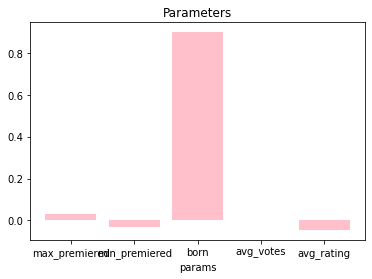

<Figure size 432x288 with 0 Axes>

In [277]:
coefs = model.coef_[:5]
x = ['max_premiered', 'min_premiered', 'born',
       'avg_votes', 'avg_rating']

from matplotlib import pyplot as plt
%matplotlib inline

plt.bar(x, coefs, color='pink')
plt.xlabel('params')
plt.ylabel('')
plt.title('Parameters')
plt.show()
plt.savefig('main_params.png')

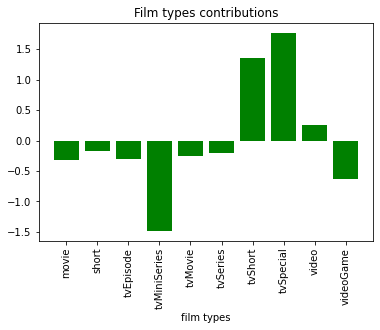

<Figure size 432x288 with 0 Axes>

In [278]:
coefs = model.coef_[5:15]
x = pd.get_dummies(df_or['film_type']).columns

from matplotlib import pyplot as plt
%matplotlib inline

plt.bar(x, coefs, color='green')
plt.xticks(rotation=90)

plt.xlabel('film types')
plt.ylabel('')
plt.title('Film types contributions')
plt.show()
plt.savefig('filmtype_params.png')

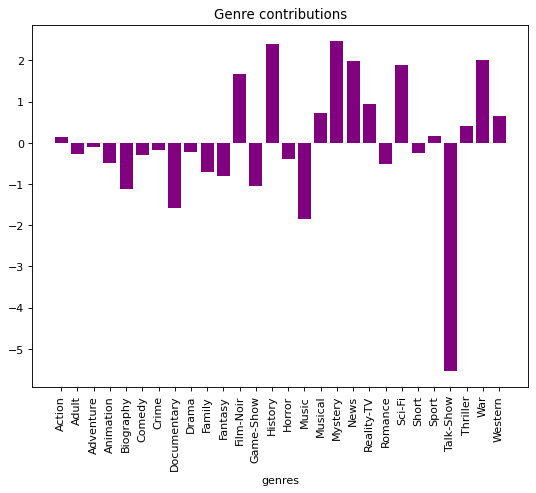

<Figure size 432x288 with 0 Axes>

In [279]:
coefs = model.coef_[15:43]
x = pd.get_dummies(df_or['genre']).columns

from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.bar(x, coefs, color='purple')
plt.xticks(rotation=90)

plt.xlabel('genres')
plt.ylabel('')
plt.title('Genre contributions')
plt.show()
plt.savefig('genre_params.png')

In [256]:
ft_array.shape

(51986, 10)